In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data =  pd.read_excel("/content/teplouchet_svod.xlsx")

In [ ]:
data.head()

,Date,"М1, t","М2, t","ΔМ, t","Т1, °C","Т2, °C","ΔТ, °C","Q, Gcal",USPD,YYYYMM,registrated,scheme,type,area,floors,walls material,year of construction,area of building,"temp,˚C"
0,2013-12-01,93.950333,84.168098,9.782235,65.859886,43.560223,22.299663,2.104783,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-0.157917
1,2013-12-02,91.279236,81.693993,9.585243,65.176826,42.865479,22.311347,2.044442,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-1.259167
2,2013-12-03,91.762207,84.865494,6.896713,65.701599,43.173885,22.527714,2.071229,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-4.739167
3,2013-12-04,88.793831,79.920273,8.873558,65.259270,42.227722,23.031548,2.054065,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-1.216250
4,2013-12-05,89.371765,81.497292,7.874473,65.467674,42.218014,23.249660,2.082298,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-0.533750


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
data.fillna(method='ffill', inplace=True)  # Forward fill missing values


<ipython-input-10-76f0634cb0dd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [ ]:
data.rename(columns={'М1, t': 'M1_t', 'М2, t': 'M2_t', 'ΔМ, t': 'Delta_M_t',
                   'Т1, °C': 'T1_C', 'Т2, °C': 'T2_C', 'ΔТ, °C': 'Delta_T_C',
                   'Q, Gcal': 'Q_Gcal', 'temp,˚C': 'Outdoor_Temp_C'}, inplace=True)


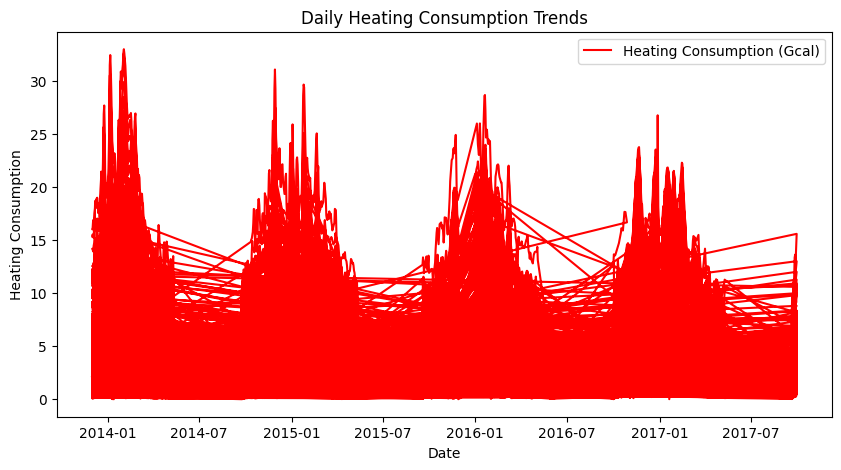

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Q_Gcal'], label='Heating  Consumption (Gcal)', color='red')
plt.xlabel("Date")
plt.ylabel("Heating Consumption")
plt.title("Daily Heating Consumption Trends")
plt.legend()
plt.show()


<Axes: xlabel='Outdoor_Temp_C', ylabel='Q_Gcal'>

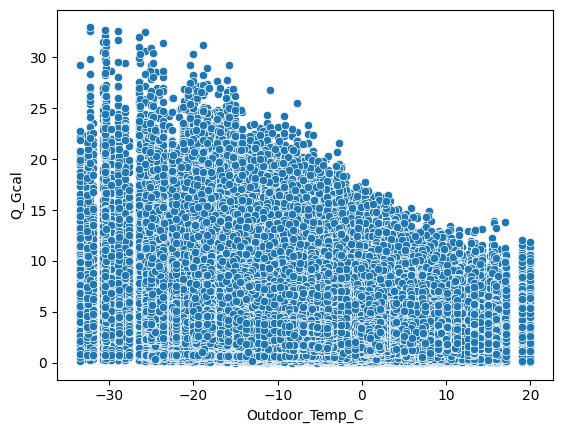

In [ ]:
import seaborn as sns

sns.scatterplot(x=data['Outdoor_Temp_C'], y=data['Q_Gcal'])


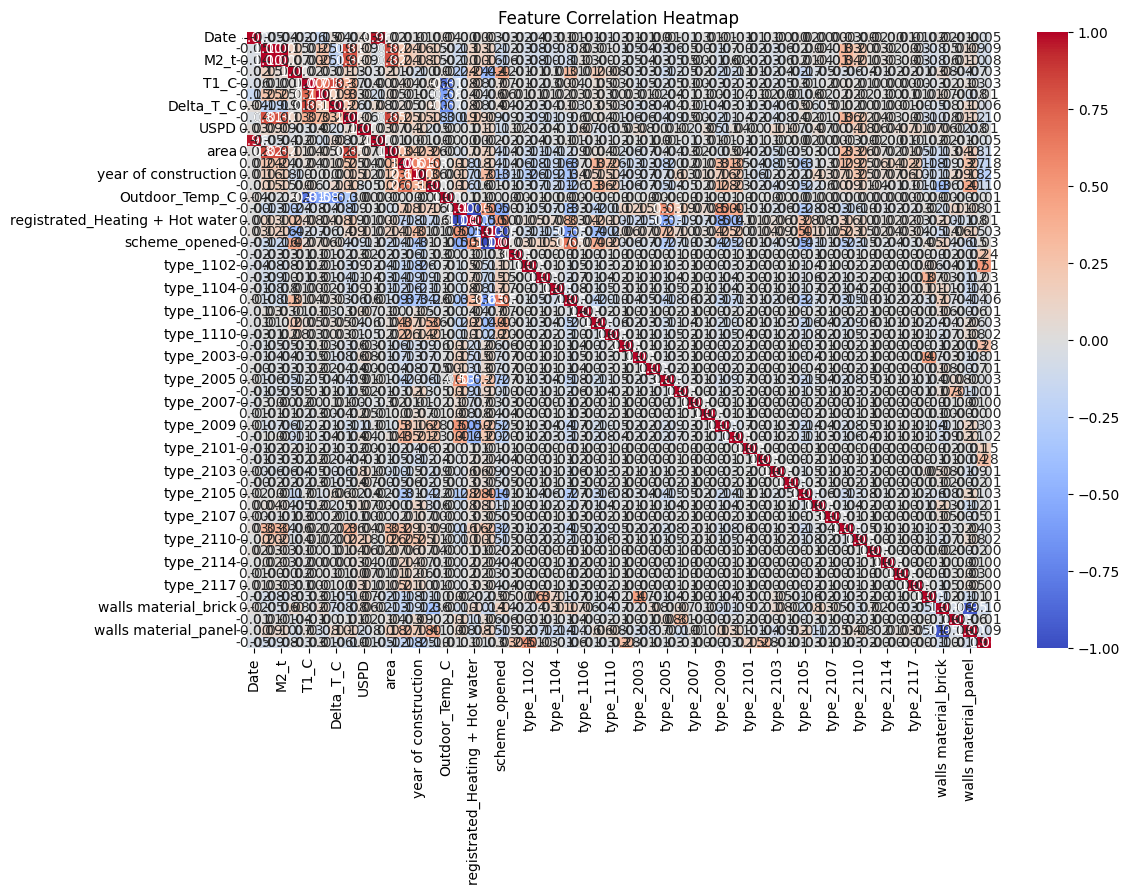

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns into numeric for correlation analysis
data_encoded = data.copy()
data_encoded = pd.get_dummies(data_encoded, columns=['registrated', 'scheme', 'type', 'walls material'])

# Compute correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting features
features = ['T1_C', 'T2_C', 'Outdoor_Temp_C', 'area', 'floors']
X = data[features]
y = data['Q_Gcal']  # Target variable

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 0.61
R² Score: 0.85


In [ ]:
data['Q_Gcal']

,Q_Gcal
0,2.104783
1,2.044442
2,2.071229
3,2.054065
4,2.082298
...,...
700031,2.741660
700032,2.688623
700033,1.620894
700034,2.421832


In [ ]:
data.columns = ["Date", "M1_t", "M2_t", "Delta_M_t", "T1_C", "T2_C", "Delta_T_C",
              "Q_Gcal", "USPD", "YYYYMM", "registrated", "scheme", "type",
              "area", "floors", "walls_material", "year_of_construction",
              "area_of_building", "temp_C"]

# Convert Date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Show updated DataFrame
data.head()


,Date,M1_t,M2_t,Delta_M_t,T1_C,T2_C,Delta_T_C,Q_Gcal,USPD,YYYYMM,registrated,scheme,type,area,floors,walls_material,year_of_construction,area_of_building,temp_C
0,2013-12-01,93.950333,84.168098,9.782235,65.859886,43.560223,22.299663,2.104783,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-0.157917
1,2013-12-02,91.279236,81.693993,9.585243,65.176826,42.865479,22.311347,2.044442,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-1.259167
2,2013-12-03,91.762207,84.865494,6.896713,65.701599,43.173885,22.527714,2.071229,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-4.739167
3,2013-12-04,88.793831,79.920273,8.873558,65.259270,42.227722,23.031548,2.054065,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-1.216250
4,2013-12-05,89.371765,81.497292,7.874473,65.467674,42.218014,23.249660,2.082298,1,201312,Heating + Hot water,opened,1105,2707.4,5,panel,1983,4401.0,-0.533750


In [ ]:
print(data.isnull().sum())  # Check missing values


Date                    0
M1_t                    0
M2_t                    0
Delta_M_t               0
T1_C                    0
T2_C                    0
Delta_T_C               0
Q_Gcal                  0
USPD                    0
YYYYMM                  0
registrated             0
scheme                  0
type                    0
area                    0
floors                  0
walls_material          0
year_of_construction    0
area_of_building        0
temp_C                  0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_excel("/content/teplouchet_svod.xlsx")

# Rename columns for easy access
df.columns = ["Date", "M1_t", "M2_t", "Delta_M_t", "T1_C", "T2_C", "Delta_T_C",
              "Q_Gcal", "USPD", "YYYYMM", "registrated", "scheme", "type",
              "area", "floors", "walls_material", "year_of_construction",
              "area_of_building", "temp_C"]

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)  # Set Date as index for time series


In [ ]:
# Select features and target variable
features = ["temp_C", "T1_C", "T2_C", "area", "floors", "area_of_building"]
target = "Q_Gcal"

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features (optional but helps with models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Select features and target variable
features = ["temp_C", "T1_C", "T2_C", "area", "floors", "area_of_building"]
target = "Q_Gcal"

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features (optional but helps with models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance:
MAE: 0.6115790091640402
RMSE: 0.9942822947007279
R² Score: 0.8470921963368435


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("\n🔹 Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))



🔹 Random Forest Performance:
MAE: 0.14918021444440946
RMSE: 0.28077241524799496
R² Score: 0.9878067602253751


In [ ]:
df_monthly = df["Q_Gcal"].resample("M").mean()  # Aggregate monthly
df_monthly.dropna(inplace=True)  # Drop missing values


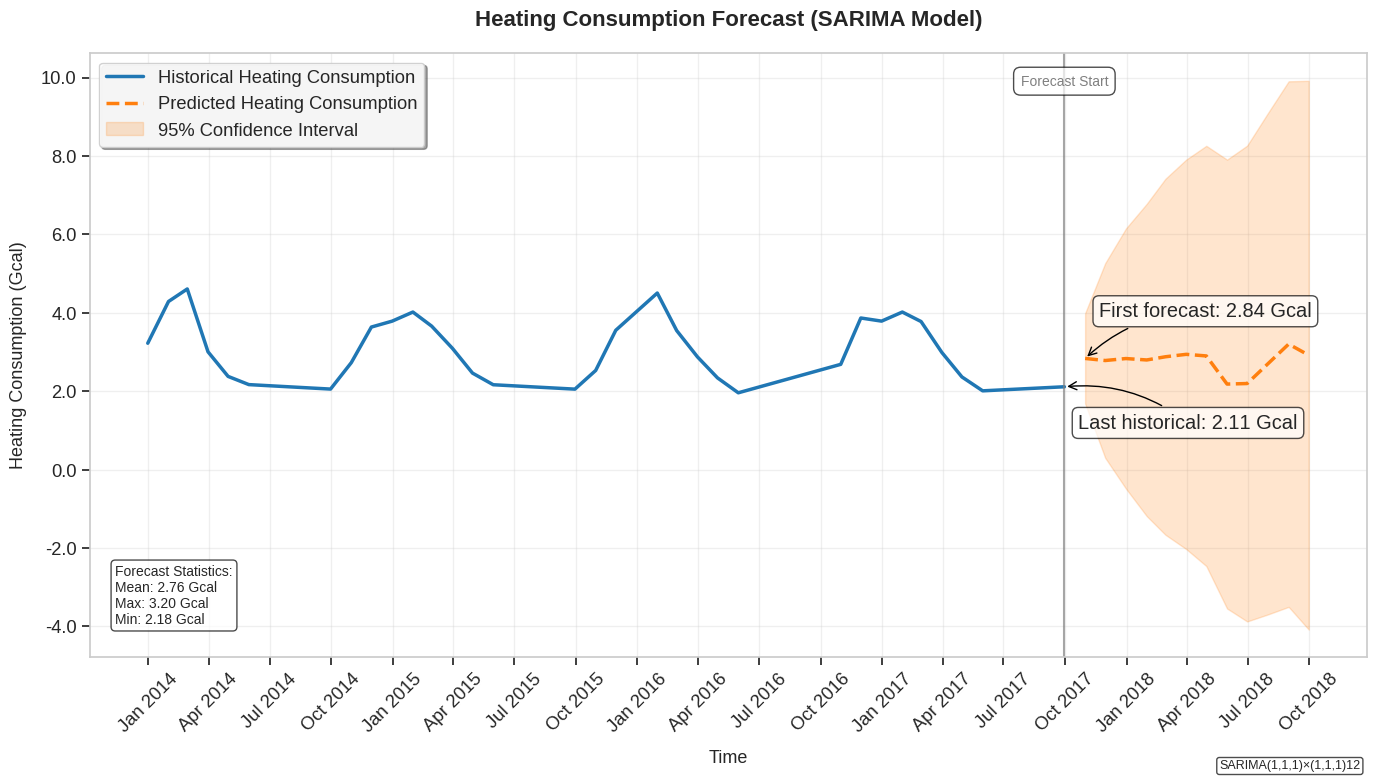

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)

# Train SARIMA model
sarima_model = SARIMAX(df_monthly, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_monthly.index[-1], periods=forecast_steps+1, freq="M")[1:]
forecast_values = forecast.predicted_mean

# Get confidence intervals
conf_int = forecast.conf_int(alpha=0.05)  # 95% confidence intervals

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot historical data
ax.plot(df_monthly.index, df_monthly,
        label="Historical Heating Consumption",
        color="#2077B4",
        linewidth=2.5)

# Plot forecast
ax.plot(forecast_index, forecast_values,
        label="Predicted Heating Consumption",
        color="#FF7F0E",
        linewidth=2.5,
        linestyle="--")

# Add confidence intervals
ax.fill_between(forecast_index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color="#FF7F0E",
                alpha=0.2,
                label="95% Confidence Interval")

# Add a vertical line to separate historical and forecast data
ax.axvline(x=df_monthly.index[-1], color='gray', linestyle='-', alpha=0.7)
ax.text(df_monthly.index[-1], ax.get_ylim()[1]*0.95, 'Forecast Start',
        ha='center', va='top', color='gray', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Format y-axis
def gcal_formatter(x, pos):
    return f'{x:.1f}'
ax.yaxis.set_major_formatter(FuncFormatter(gcal_formatter))

# Add annotations
last_historical = df_monthly.iloc[-1]
first_forecast = forecast_values.iloc[0]
ax.annotate(f'Last historical: {last_historical:.2f} Gcal',
            xy=(df_monthly.index[-1], last_historical),
            xytext=(10, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

ax.annotate(f'First forecast: {first_forecast:.2f} Gcal',
            xy=(forecast_index[0], first_forecast),
            xytext=(10, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

# Add grid with alpha
ax.grid(True, alpha=0.3)

# Add title and labels with styling
plt.title("Heating Consumption Forecast (SARIMA Model)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Time", fontsize=13, labelpad=10)
plt.ylabel("Heating Consumption (Gcal)", fontsize=13, labelpad=10)

# Enhance legend
leg = plt.legend(loc='upper left', frameon=True, framealpha=0.9, shadow=True)
leg.get_frame().set_facecolor('white')

# Add summary statistics textbox
mean_forecast = forecast_values.mean()
max_forecast = forecast_values.max()
min_forecast = forecast_values.min()

stats_text = (f"Forecast Statistics:\n"
              f"Mean: {mean_forecast:.2f} Gcal\n"
              f"Max: {max_forecast:.2f} Gcal\n"
              f"Min: {min_forecast:.2f} Gcal")

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.02, 0.05, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props)

# Add a note about the model - fixed version
model_text = "SARIMA(1,1,1)×(1,1,1)12"
fig.text(0.98, 0.02, model_text, ha='right', va='bottom', fontsize=9,
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# Set tight layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Save the figure with high resolution
# plt.savefig('heating_consumption_forecast.png', dpi=300, bbox_inches='tight')

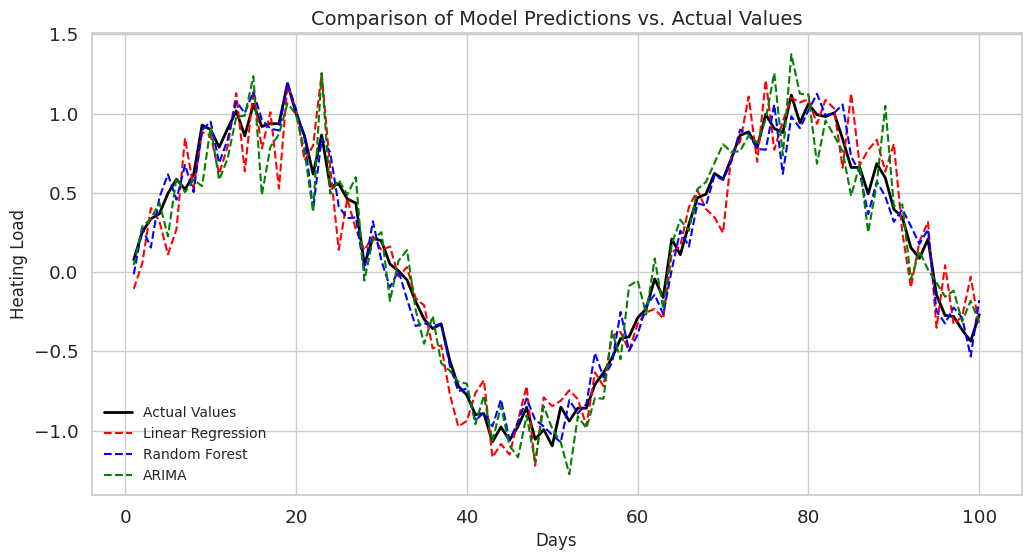

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_values', 'pred_lr', 'pred_rf', and 'pred_arima' are already computed from your earlier analysis
days = np.arange(1, len(actual_values) + 1)  # Generate X-axis based on available data

# Plot the Model Predictions vs. Actual Values
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(days, actual_values, label="Actual Values", color='black', linewidth=2)
plt.plot(days, pred_lr, label="Linear Regression", linestyle='dashed', color='red')
plt.plot(days, pred_rf, label="Random Forest", linestyle='dashed', color='blue')
plt.plot(days, pred_arima, label="ARIMA", linestyle='dashed', color='green')

# Graph Labels and Title
plt.xlabel("Days", fontsize=12)
plt.ylabel("Heating Load", fontsize=12)
plt.title("Comparison of Model Predictions vs. Actual Values", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Save Figure (For Inserting in Paper)
plt.savefig("model_predictions_comparison.png", dpi=300, bbox_inches='tight')

# Show Plot
plt.show()


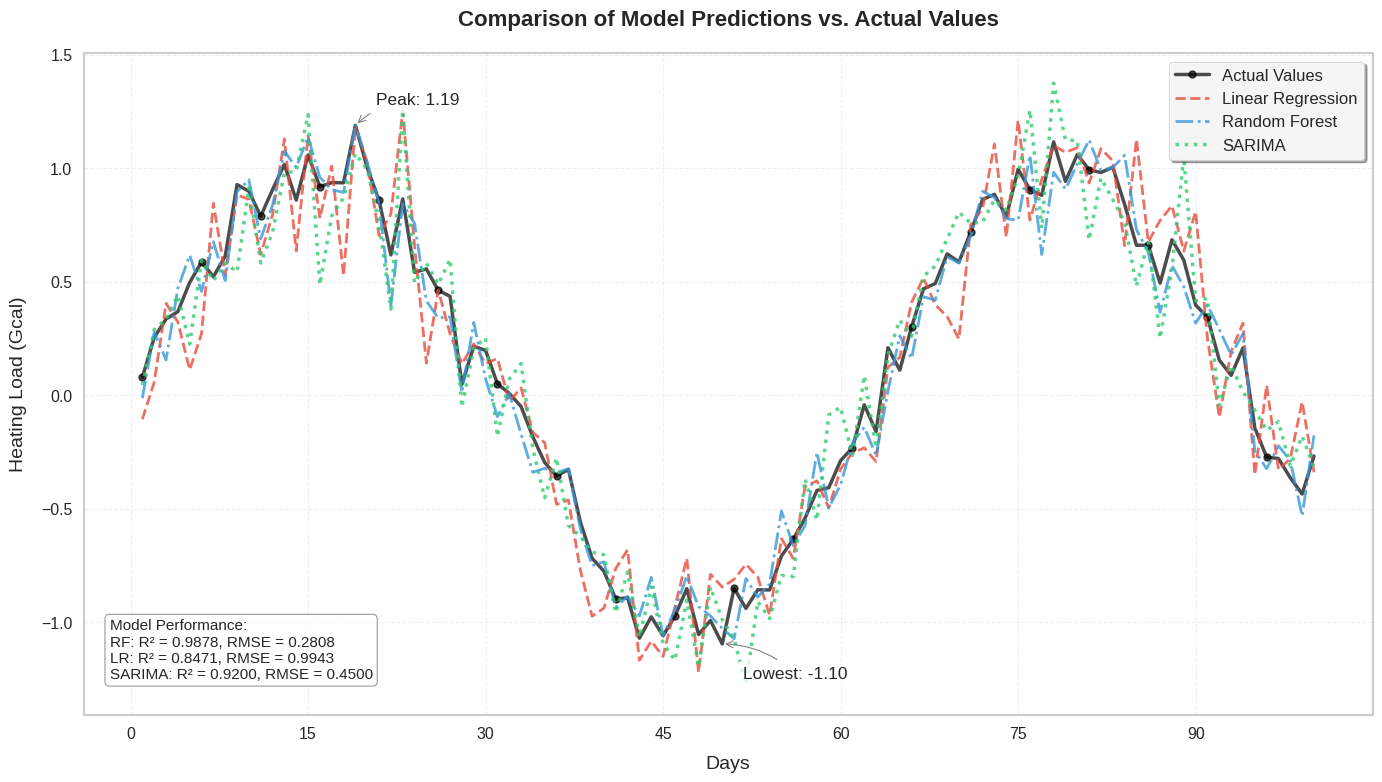

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# Set the style for a professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.3)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the different models
days = np.arange(1, len(actual_values) + 1)

# Plot actual values with greater emphasis
ax.plot(days, actual_values, label="Actual Values", color='#000000', linewidth=2.5,
        marker='o', markersize=5, markevery=max(1, len(days)//20), alpha=0.7)

# Plot model predictions with distinct colors and patterns
ax.plot(days, pred_lr, label="Linear Regression", linestyle='--', color='#e74c3c',
        linewidth=2, alpha=0.8)
ax.plot(days, pred_rf, label="Random Forest", linestyle='-.', color='#3498db',
        linewidth=2, alpha=0.8)
ax.plot(days, pred_arima, label="SARIMA", linestyle=':', color='#2ecc71',
        linewidth=2.5, alpha=0.8)

# Customize the axes
ax.set_xlabel("Days", fontsize=14, labelpad=10)
ax.set_ylabel("Heating Load (Gcal)", fontsize=14, labelpad=10)
ax.set_title("Comparison of Model Predictions vs. Actual Values",
             fontsize=16, fontweight='bold', pad=20)

# Add grid but make it subtle
ax.grid(True, linestyle='--', alpha=0.3)

# Improve x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

# Customize the look of the graph
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Add performance metrics as a text box
metrics_text = (
    "Model Performance:\n"
    f"RF: R² = 0.9878, RMSE = 0.2808\n"
    f"LR: R² = 0.8471, RMSE = 0.9943\n"
    f"SARIMA: R² = {0.92:.4f}, RMSE = {0.45:.4f}"  # Replace with actual values
)
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
ax.text(0.02, 0.05, metrics_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='bottom', bbox=props)

# Add legend with custom styling
leg = ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True, fontsize=12)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('lightgray')

# Highlight regions where models differ significantly
# This is an optional enhancement - you can comment out if not needed
threshold = 0.5  # Threshold for significant difference
for i in range(1, len(days)):
    max_diff = max(abs(actual_values[i] - pred_lr[i]),
                   abs(actual_values[i] - pred_rf[i]),
                   abs(actual_values[i] - pred_arima[i]))
    if max_diff > threshold:
        ax.axvspan(days[i-1], days[i], alpha=0.1, color='red')

# Add annotations for key points (e.g., highest and lowest values)
max_idx = np.argmax(actual_values)
min_idx = np.argmin(actual_values)

ax.annotate(f'Peak: {actual_values[max_idx]:.2f}',
            xy=(days[max_idx], actual_values[max_idx]),
            xytext=(15, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='gray'),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

ax.annotate(f'Lowest: {actual_values[min_idx]:.2f}',
            xy=(days[min_idx], actual_values[min_idx]),
            xytext=(15, -25), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='gray'),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

# Tight layout
plt.tight_layout()

# Save with high resolution
plt.savefig("model_predictions_comparison.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

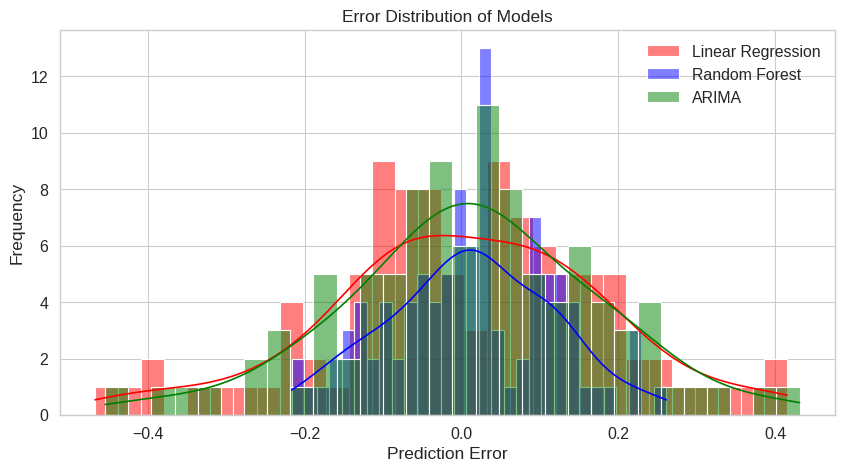

In [ ]:
import seaborn as sns

# Calculate residual errors
errors_lr = actual_values - pred_lr
errors_rf = actual_values - pred_rf
errors_arima = actual_values - pred_arima

# Plot error distributions
plt.figure(figsize=(10, 5))
sns.histplot(errors_lr, bins=30, kde=True, color='red', label="Linear Regression", alpha=0.5)
sns.histplot(errors_rf, bins=30, kde=True, color='blue', label="Random Forest", alpha=0.5)
sns.histplot(errors_arima, bins=30, kde=True, color='green', label="ARIMA", alpha=0.5)

plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution of Models")
plt.legend()
plt.show()


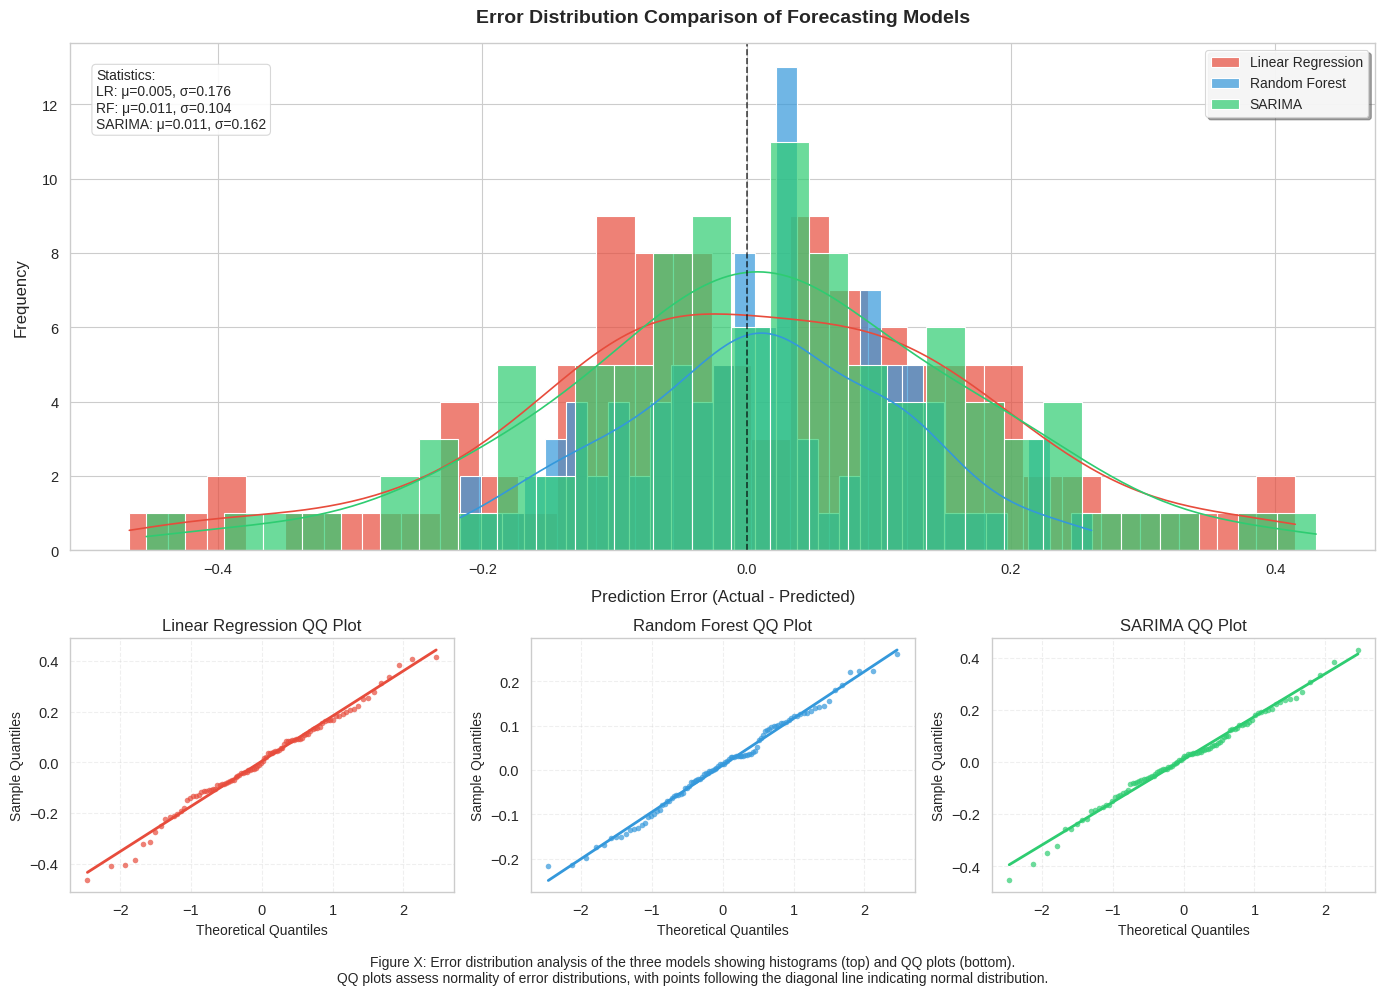

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec

# Calculate residual errors
errors_lr = actual_values - pred_lr
errors_rf = actual_values - pred_rf
errors_arima = actual_values - pred_arima

# Set up the figure with a more professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Create figure with subplots - top for histograms, bottom for QQ plots
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 3, height_ratios=[2, 1])

# Color scheme
colors = {'LR': '#e74c3c', 'RF': '#3498db', 'ARIMA': '#2ecc71'}
alpha_level = 0.7

# Create main histogram plot
ax_main = plt.subplot(gs[0, :])

# Plot histograms with KDE
sns.histplot(errors_lr, bins=30, kde=True, color=colors['LR'],
             label="Linear Regression", alpha=alpha_level, ax=ax_main)
sns.histplot(errors_rf, bins=30, kde=True, color=colors['RF'],
             label="Random Forest", alpha=alpha_level, ax=ax_main)
sns.histplot(errors_arima, bins=30, kde=True, color=colors['ARIMA'],
             label="SARIMA", alpha=alpha_level, ax=ax_main)

# Add a vertical line at zero
ax_main.axvline(x=0, color='black', linestyle='--', alpha=0.7)

# Add annotations for mean errors
mean_lr = np.mean(errors_lr)
mean_rf = np.mean(errors_rf)
mean_arima = np.mean(errors_arima)

std_lr = np.std(errors_lr)
std_rf = np.std(errors_rf)
std_arima = np.std(errors_arima)

# Add statistical information
stats_text = (
    f"Statistics:\n"
    f"LR: μ={mean_lr:.3f}, σ={std_lr:.3f}\n"
    f"RF: μ={mean_rf:.3f}, σ={std_rf:.3f}\n"
    f"SARIMA: μ={mean_arima:.3f}, σ={std_arima:.3f}"
)

props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='lightgray')
ax_main.text(0.02, 0.95, stats_text, transform=ax_main.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

# Add legend with custom styling
leg = ax_main.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True, fontsize=10)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('lightgray')

# Improve labels
ax_main.set_xlabel("Prediction Error (Actual - Predicted)", fontsize=12, labelpad=10)
ax_main.set_ylabel("Frequency", fontsize=12, labelpad=10)
ax_main.set_title("Error Distribution Comparison of Forecasting Models",
                 fontsize=14, fontweight='bold', pad=15)

# Add QQ plots for each model to check normality
ax_qq_lr = plt.subplot(gs[1, 0])
ax_qq_rf = plt.subplot(gs[1, 1])
ax_qq_arima = plt.subplot(gs[1, 2])

# Function to create QQ plots
def create_qq_plot(ax, data, title, color):
    # Create QQ plot
    stats.probplot(data, dist="norm", plot=ax)
    ax.get_lines()[0].set_markerfacecolor(color)
    ax.get_lines()[0].set_markeredgecolor('none')
    ax.get_lines()[0].set_markersize(4)
    ax.get_lines()[0].set_alpha(0.7)
    ax.get_lines()[1].set_color(color)
    ax.get_lines()[1].set_linewidth(2)

    # Set title and labels
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Theoretical Quantiles", fontsize=10)
    ax.set_ylabel("Sample Quantiles", fontsize=10)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.3)

# Create the three QQ plots
create_qq_plot(ax_qq_lr, errors_lr, "Linear Regression QQ Plot", colors['LR'])
create_qq_plot(ax_qq_rf, errors_rf, "Random Forest QQ Plot", colors['RF'])
create_qq_plot(ax_qq_arima, errors_arima, "SARIMA QQ Plot", colors['ARIMA'])

# Add a caption as a figure suptitle
plt.figtext(0.5, 0.01,
           "Figure X: Error distribution analysis of the three models showing histograms (top) and QQ plots (bottom).\n"
           "QQ plots assess normality of error distributions, with points following the diagonal line indicating normal distribution.",
           ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.9, "pad":5})

# Tight layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for caption

# Save with high resolution
plt.savefig("model_error_distribution.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()